<a href="https://colab.research.google.com/github/SFCC99/CE880-Case-Study/blob/main/Data_Research_Paper_SC21133.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
import matplotlib
import seaborn as sns

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score, make_scorer
from sklearn.naive_bayes import GaussianNB
f1 = make_scorer(f1_score, average = 'binary', pos_label = 1)

## Charging Data Base

In [ ]:
!git clone https://github.com/SFCC99/CE880-Case-Study.git

fatal: destination path 'CE880-Case-Study' already exists and is not an empty directory.


In [ ]:
df = pd.read_csv("/content/CE880-Case-Study/fetal_health.csv")
df.head()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120.0,0.000,0.0,0.000,0.000,0.0,0.0,73.0,0.5,43.0,...,62.0,126.0,2.0,0.0,120.0,137.0,121.0,73.0,1.0,2.0
1,132.0,0.006,0.0,0.006,0.003,0.0,0.0,17.0,2.1,0.0,...,68.0,198.0,6.0,1.0,141.0,136.0,140.0,12.0,0.0,1.0
2,133.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.1,0.0,...,68.0,198.0,5.0,1.0,141.0,135.0,138.0,13.0,0.0,1.0
3,134.0,0.003,0.0,0.008,0.003,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,11.0,0.0,137.0,134.0,137.0,13.0,1.0,1.0
4,132.0,0.007,0.0,0.008,0.000,0.0,0.0,16.0,2.4,0.0,...,53.0,170.0,9.0,0.0,137.0,136.0,138.0,11.0,1.0,1.0


##Description DataBase

In [ ]:
df.describe()

,baseline value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
count,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.00000,...,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000,2126.000000
mean,133.303857,0.003178,0.009481,0.004366,0.001889,0.000003,0.000159,46.990122,1.332785,9.84666,...,93.579492,164.025400,4.068203,0.323612,137.452023,134.610536,138.090310,18.808090,0.320320,1.304327
std,9.840844,0.003866,0.046666,0.002946,0.002960,0.000057,0.000590,17.192814,0.883241,18.39688,...,29.560212,17.944183,2.949386,0.706059,16.381289,15.593596,14.466589,28.977636,0.610829,0.614377
min,106.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,0.200000,0.00000,...,50.000000,122.000000,0.000000,0.000000,60.000000,73.000000,77.000000,0.000000,-1.000000,1.000000
25%,126.000000,0.000000,0.000000,0.002000,0.000000,0.000000,0.000000,32.000000,0.700000,0.00000,...,67.000000,152.000000,2.000000,0.000000,129.000000,125.000000,129.000000,2.000000,0.000000,1.000000
50%,133.000000,0.002000,0.000000,0.004000,0.000000,0.000000,0.000000,49.000000,1.200000,0.00000,...,93.000000,162.000000,3.000000,0.000000,139.000000,136.000000,139.000000,7.000000,0.000000,1.000000
75%,140.000000,0.006000,0.003000,0.007000,0.003000,0.000000,0.000000,61.000000,1.700000,11.00000,...,120.000000,174.000000,6.000000,0.000000,148.000000,145.000000,148.000000,24.000000,1.000000,1.000000
max,160.000000,0.019000,0.481000,0.015000,0.015000,0.001000,0.005000,87.000000,7.000000,91.00000,...,159.000000,238.000000,18.000000,10.000000,187.000000,182.000000,186.000000,269.000000,1.000000,3.000000


# Correlation Heatmap

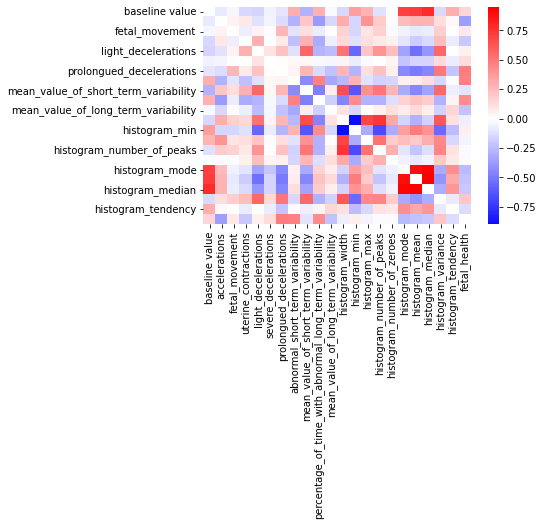

In [ ]:
df_corr = df.corr()
np.fill_diagonal(df_corr.values, 0)
sns.heatmap(df_corr, center=0, cmap = 'bwr')

#Histograms of the data

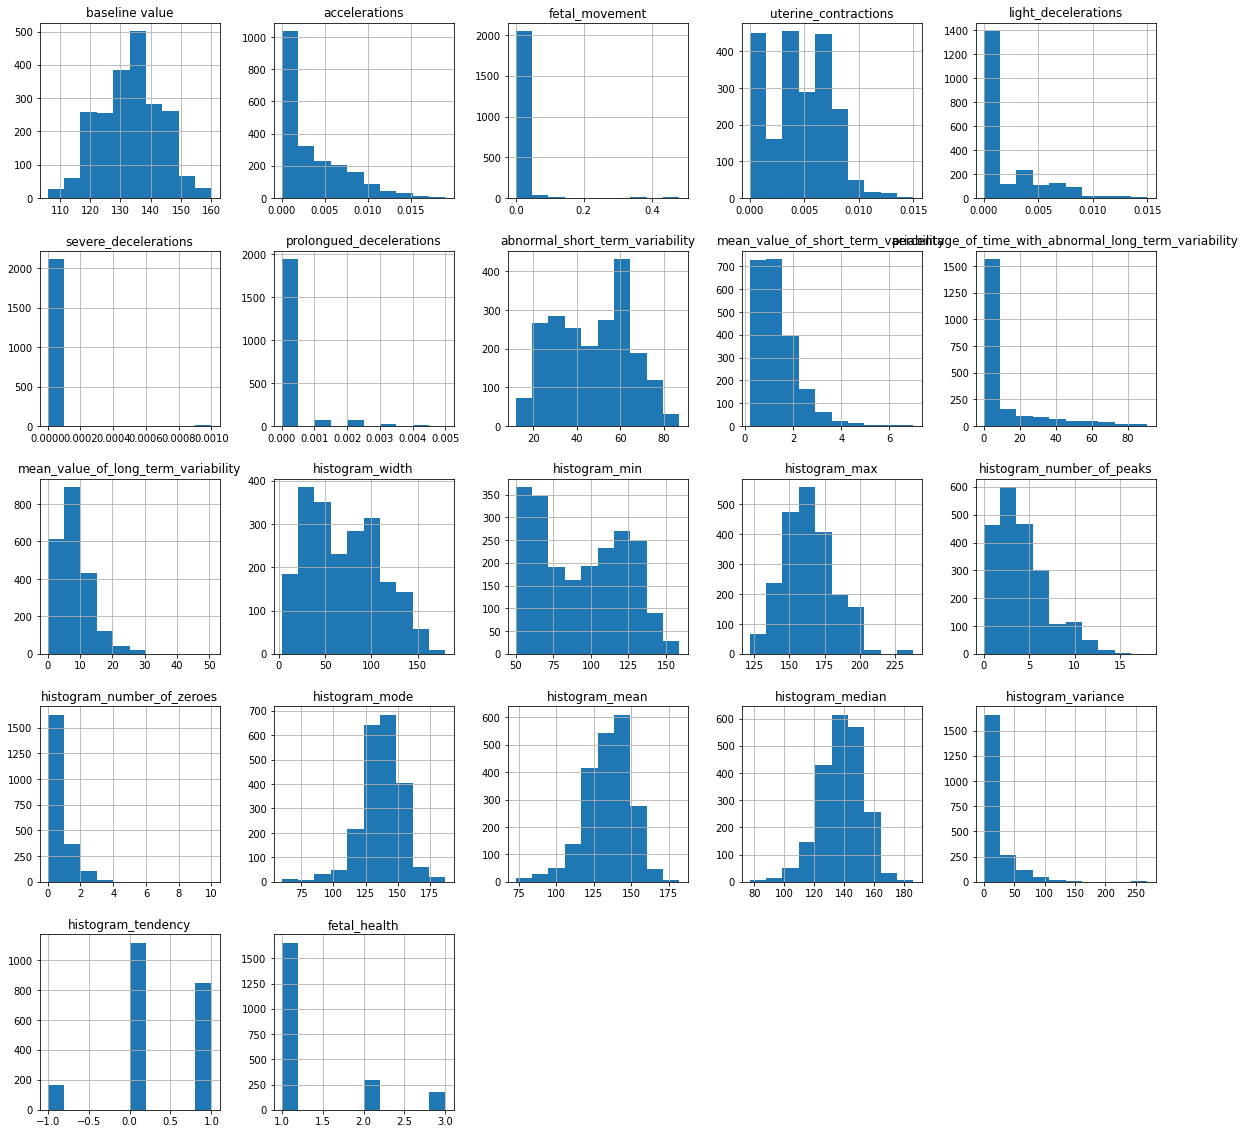

In [ ]:
hist_df = df.hist(figsize = (20,20))

# Data plotted with each variable as axis X and "fetal_health" as axis Y

In [ ]:
import matplotlib.pyplot as plt
fig,axes = plt.subplots(nrows = 6, ncols=4, figsize = (20, 20))

axes = axes.flatten()

for i in range(0, 22):
  axes[i].plot(df.iloc[:,i],df['fetal_health'],'o', alpha = .5)
  axes[i].set_title(df.columns[i])

plt.tight_layout()


## Train-Test Split

In [ ]:
X = df.drop("fetal_health", axis = 1)
Y = df["fetal_health"]

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)

##Scaling

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test) 
f1 = make_scorer(f1_score, average = 'binary', pos_label = 1)

## KNN Clasiffier

In [ ]:
def KNN_CLASS(fetal_health):
  X = df.drop("fetal_health", axis = 1)
  Y = fetal_health
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)
  knn = KNeighborsClassifier()
  ks = list(range(1, 5))
  parameter_grid = {'n_neighbors': ks}
  knn_cv = GridSearchCV(knn, parameter_grid, cv=10, scoring=f1)
  #fit model to data
  knn_cv.fit(X_train, Y_train)
  pred_knn = knn_cv.predict(X_test)
  print(confusion_matrix(Y_test, pred_knn))
  print(classification_report(Y_test, pred_knn))
  print(knn_cv.best_params_)
  return accuracy_score(Y_test, pred_knn)*100, classification_report(Y_test, pred_knn, output_dict=True)

In [ ]:
Knn_ac, clas_knn = KNN_CLASS(df['fetal_health'])

In [ ]:
df_knn = pd.DataFrame(clas_knn).transpose()
knn_f1 = df_knn.loc[:, ['f1-score']]
knn_f1

##Decision Tree


In [ ]:
def dsc_Tree(fetal_health):
  X = df.drop("fetal_health", axis = 1)
  Y = fetal_health
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)
  decision_tree = tree.DecisionTreeClassifier(criterion='gini')
  parameter_g =  {'max_depth':[2,4,6,8,10,12]}
  dcs_tree_gs = GridSearchCV(decision_tree, param_grid = parameter_g, cv=10, scoring=f1)
  dcs_tree_gs.fit(X_train, Y_train)
  y_predict_dt = dcs_tree_gs.predict(X_test)
  print(confusion_matrix(Y_test, y_predict_dt))
  print(classification_report(Y_test, y_predict_dt))
  print(dcs_tree_gs.best_params_)
  return accuracy_score(Y_test, y_predict_dt)*100, classification_report(Y_test, y_predict_dt, output_dict=True)

In [ ]:
accu_sc_dsc, clas_dsc = dsc_Tree(df['fetal_health'])

In [ ]:
df_dsc = pd.DataFrame(clas_dsc).transpose()
dsc_f1 = df_dsc.loc[:, ['f1-score']]

##Random Forest


In [ ]:
from math import sqrt
def Random_Class(fetal_health): 
  X = df.drop("fetal_health", axis = 1)
  Y = fetal_health
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)
  model_rf = RandomForestClassifier()
  model_rf.fit(X_train, Y_train)
  pred_rf = model_rf.predict(X_test)
  model_rf2 = RandomForestClassifier()
  parameter_grid = {'n_estimators': [32, 64, 100, 128, 200],
                  'max_features': [2, 3, 4, 10, 21, sqrt(21)]}
  model_rf_cv = GridSearchCV(model_rf2, parameter_grid, cv=10, scoring=f1)
  #fit model to data
  model_rf_cv.fit(X_train, Y_train.values.ravel())
  pred_rf_cv = model_rf_cv.predict(X_test)
  print(confusion_matrix(Y_test, pred_rf_cv))
  print(classification_report(Y_test, pred_rf_cv))
  print(model_rf_cv.best_params_)
  return accuracy_score(Y_test, pred_rf_cv)*100, classification_report(Y_test, pred_rf_cv, output_dict=True)

In [ ]:
RND_Frst_acc, clas_RDF = Random_Class(df['fetal_health']) 

In [ ]:
df_rnd = pd.DataFrame(clas_RDF).transpose()
rnd_f1 = df_rnd.loc[:, ['f1-score']]

##Support Vector Machine


In [ ]:
svcmod = SVC(gamma='auto')
from sklearn import svm, datasets
def func_svc(fetal_health):
  X = df.drop("fetal_health", axis = 1)
  Y = fetal_health
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)
  svcmod.fit(X_train, Y_train)
  pred_svc = svcmod.predict(X_test)
  param_grid = {'C':[1,10,100,1000], # cost for miss classification
              'gamma':[1,0.1,0.001,0.0001], # flexibility of the model 
              'kernel':['rbf']}
  svc_cv = GridSearchCV(SVC(),param_grid, refit = True, verbose=2)
  svc_cv.fit(X_train,Y_train)
  pred_svc = svc_cv.predict(X_test)
  print(classification_report(Y_test, pred_svc))
  print(confusion_matrix(Y_test, pred_svc))
  print(svc_cv.best_params_)
  return accuracy_score(Y_test, pred_svc)*100, classification_report(Y_test, pred_svc, output_dict=True)

In [ ]:
acc_svc, clas_svc = func_svc(df['fetal_health'])

In [ ]:
df_svc = pd.DataFrame(clas_svc).transpose()
svc_f1 = df_svc.loc[:, ['f1-score']]

##AdaBoost 

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
def funAda_Boost(fetal_health): 
  X = df.drop("fetal_health", axis = 1)
  Y = fetal_health
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)
  model_ab = AdaBoostClassifier()
  model_ab.fit(X_train, Y_train)
  pred_ab = model_ab.predict(X_test)
  parameter_grid = {'n_estimators': [30, 50, 100, 200],
                  'learning_rate':[0.01, 0.1, 0.2, 0.5, 1.0]}
  model_ab_cv = GridSearchCV(model_ab, parameter_grid, cv=10, scoring=f1)
  #fit model to data
  model_ab_cv.fit(X_train, Y_train.values.ravel())
  pred_ab_cv = model_ab_cv.predict(X_test)
  print(confusion_matrix(Y_test, pred_ab_cv))
  print(classification_report(Y_test, pred_ab_cv))
  print(model_ab_cv.best_params_)
  return accuracy_score(Y_test, pred_ab_cv)*100, classification_report(Y_test, pred_ab_cv, output_dict=True)

In [ ]:
acc_ada, clas_ada = funAda_Boost(df['fetal_health'])

In [ ]:
df_ada = pd.DataFrame(clas_ada).transpose()
ada_f1 = df_ada.loc[:, ['f1-score']]

##Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
def fun_NB(fetal_health):
  X = df.drop("fetal_health", axis = 1)
  Y = fetal_health
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=101)
  model_gnb = GaussianNB()
  model_gnb.fit(X_train, Y_train)
  pred_gnb = model_gnb.predict(X_test)
  print(confusion_matrix(Y_test, pred_gnb))
  print(classification_report(Y_test, pred_gnb))
  return accuracy_score(Y_test, pred_gnb)*100, classification_report(Y_test, pred_gnb, output_dict=True)

In [ ]:
acc_gnb, clas_gnb = fun_NB(df['fetal_health'])

In [ ]:
df_gnb = pd.DataFrame(clas_gnb).transpose()
gnb_f1 = df_gnb.loc[:, ['f1-score']]

##DataFrame with f-1 scores


In [ ]:
knn_f1['Decision Tree']=dsc_f1
knn_f1['Random Forest']=rnd_f1
knn_f1['SVM']=svc_f1
knn_f1['AdaBoost']=ada_f1
knn_f1['GNB']=gnb_f1
knn_f1.rename(({'f1-score':'KNN'}), axis=1, inplace=True)
F1_Scores = knn_f1
F1_Scores

